### Transform mpiblib output parameter measurements to taulop-Lib parameter format.

In [129]:
import pandas            as pd
import numpy             as np 
import matplotlib        as mpl
import matplotlib.pyplot as plt

In [137]:
# configuration

channels   = ["SHM", "TCP", "IB"]

machines   = ["metropolis"]

benchmarks = ["pingpong"]

path_imb    = "."
path_taulop = "/Users/jarico/Documents/Investigacion/Software/taulop-tool/pruebas/imb"


In [138]:
    
def getBenchmarkTimes (lines):
    
    cols = ["m", "latency", "bandwidth"]
    
    num_line = 0
    for line in lines: 
        
        line = line.lstrip()
        if line[0:6] == '#bytes':
            break
            
        num_line += 1
        
            
    t = dict()
    for i in range(num_line + 1, len(lines)):
        
        if lines[i][0] == '#':
            continue
            
        value = lines[i][0:-1]   # Avoid last '\n'
        v = value.split("\t")    # Convert into a list
        
        if (len(v) < 5):
            continue
                    
        # Avoid first element (it is a trailing \t introduced by IMB)
        m   = int(v[1])
        lat = float(v[3]) / 1000000. # IMB returns usec, hence, to secs.
        bw  = float(v[4])
        
        t[m] = [lat, bw]
           
            
    times = pd.DataFrame(t.values(), index = t.keys(), columns = ["Latency", "Bandwidth"])
    return times



In [163]:
    
def getTaulopTimes (lines):
    
    cols = ["m", "latency", "bandwidth"]
        
    num_line = 0
    for line in lines: 
        
        line = line.lstrip()
        if line[0:6] == '#bytes':
            break
            
        num_line += 1
        
        
    t = dict()
    for i in range(num_line + 1, len(lines)):
        
        if lines[i][0] == '#':
            continue
            
        value = lines[i][0:-1]   # Avoid last '\n'
        v = value.split("\t")    # Convert into a list
                
        if (len(v) < 4):
            continue
                    
        # Avoid first element (it is a trailing \t introduced by IMB)
        m   = int(v[0])
        lat = float(v[2]) / 1000000. # IMB returns usec, hence, to secs.
        bw  = float(v[3])
        
        t[m] = [lat, bw]
           
            
    times = pd.DataFrame(t.values(), index = t.keys(), columns = ["Latency", "Bandwidth"])
    return times



In [164]:
def compareAccuracyChannel(machine, channel, benchmark, plot=False):


    # 1. Read lines of the benchmark IMB file:
    imb_filename = path_imb + "/" + machine + "_" + benchmark + "_" + channel + ".txt"
    with open(imb_filename) as f_bench:

        imb_lines = f_bench.readlines()

        f_bench.close()


        
    # 2. Read lines of the taulop predictions file:
    tlop_filename = path_taulop + "/taulop_" + machine + "_" + benchmark + "_" + channel + ".txt"
    with open(tlop_filename) as f_bench:

        tlop_lines = f_bench.readlines()

        f_bench.close()
        

        
    # 3. Get data from IMB files
    imb_times = getBenchmarkTimes(imb_lines)

    
    
    # 4. Get data from taulop files
    tlop_times = getTaulopTimes(tlop_lines)
    
    

    # 5. Plot values.    
    if plot:
        fig, ax = plt.subplots(1, 2, figsize=(16,6), dpi=80, sharex=True)

        x = imb_times.index

        ax[0].plot(x, imb_times['Latency'])
        ax[0].plot(x, tlop_times['Latency'])
        ax[0].set_title("Latency")
        ax[0].xaxis.set_ticks(x)
        ax[0].set_xticklabels(imb_times.index, rotation=45)
        ax[0].set_xlabel("m (bytes)")
        ax[0].set_ylabel("time (secs)")

        ax[1].plot(x, imb_times['Bandwidth'])
        ax[1].plot(x, tlop_times['Bandwidth'])
        ax[1].set_title("Bandwidth")
        ax[1].set_xticklabels(imb_times.index, rotation=45)
        ax[1].set_ylabel("MBytes/sec")

        title = "Machine: " + machine + "   Benchmark: " + benchmark + "   Channel: " + channel
        fig.suptitle(title)
        plt.show()

        
    return

              Latency    Bandwidth
1        4.788900e-07     1.991428
64       5.243400e-07   116.403839
128      5.418450e-07   225.286285
256      6.201600e-07   393.673386
512      8.525200e-07   572.750614
1024     9.948700e-07   981.598096
1536     1.327958e-06  1103.079585
2048     1.342527e-06  1454.812843
3072     1.700177e-06  1723.166202
4096     3.741111e-06  1044.141600
5120     4.041259e-06  1208.240466
6144     4.315574e-06  1357.727883
7168     4.586219e-06  1490.538752
8192     4.969634e-06  1572.047386
16384    7.181553e-06  2175.713365
32768    1.145605e-05  2727.816179
49152    1.641968e-05  2854.805584
65536    2.146296e-05  2911.994167
98304    3.055025e-05  3068.714438
131072   3.961867e-05  3155.078311
196608   5.731605e-05  3271.335168
262144   7.508811e-05  3329.421783
393216   1.091489e-04  3435.674394
524288   1.426977e-04  3503.911022
786432   2.110194e-04  3554.175687
1048576  2.792998e-04  3580.382525
1572864  5.392629e-04  2781.574848
2097152  5.522684e-0

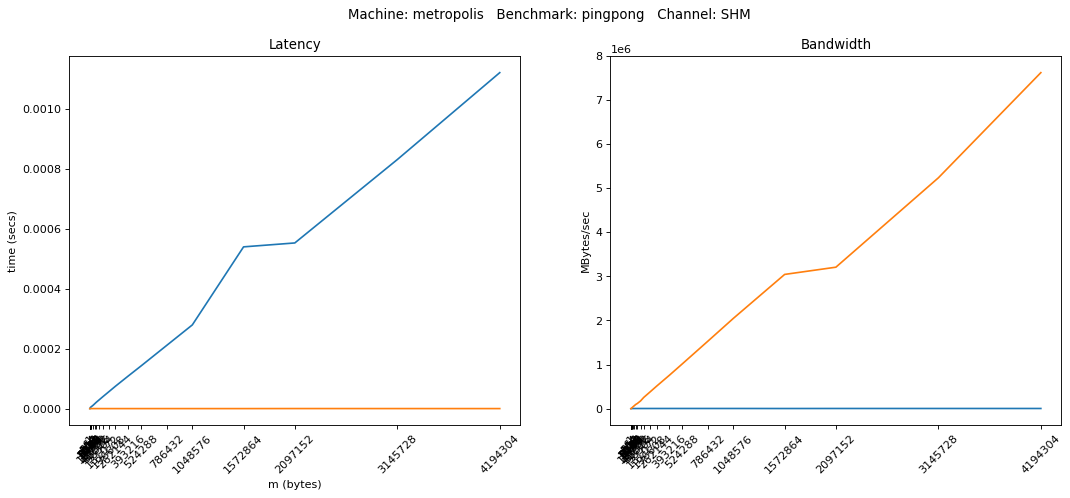

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jarico/Documents/Investigacion/Software/taulop-tool/pruebas/imb/taulop_metropolis_pingpong_TCP.txt'

In [165]:
# main

if __name__ == "__main__":
    
    for machine in machines:
        
        for channel in channels:
            
            for benchmark in benchmarks:
        
                compareAccuracyChannel(machine, channel, benchmark, plot=True)
